# Currency Ising Model Visualisations

### Import Libraries

In [1]:
# Import necessary libraries for data handling and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set up the visualisation settings for seaborn
sns.set_theme(style="whitegrid")

### Load Optimised Parameters

##### Define the file paths for the optimised J matrix and h vector

In [2]:
def load_J_and_h(J_file_path, h_file_path):
    # Load the J matrix from the csv file
    J_df = pd.read_csv(J_file_path)

    # Extract currency symbols from the DataFrame
    symbols = J_df.columns.tolist()
    symbols = [col[:3] if len(col) == 6 else col for col in symbols]

    # Convert the DataFrame to a numpy array
    J = J_df.values

    # Load the h vector from the csv file
    h = pd.read_csv(h_file_path, header=None)[1].values

    # Confirm the shapes of the loaded J matrix and h vector
    print(f"Shape of J matrix: {J.shape}")
    print(f"Length of h vector: {len(h)}")

    return J, h, symbols

# J, h, symbols = load_J_and_h('Results/J.csv', 'Results/h.csv')
J, h, symbols = load_J_and_h('Results/J_BTC.csv', 'Results/h_BTC.csv')

Shape of J matrix: (27, 27)
Length of h vector: 27


### Function to Add Title and Subtitle

In [3]:
# Define a function to add a title and a subtitle to a matplotlib figure
def add_title_and_subtitle(title, subtitle, title_space=1.10, subtitle_space=1.01):
    """
    Add a main title and a subtitle to a matplotlib figure.

    Parameters:
    title (str): The main title text.
    subtitle (str): The subtitle text.
    title_space (float): The space above the title. Default is 1.06.
    subtitle_space (float): The space for the subtitle just below the title. Default is 1.03.
    """
    plt.title(title, y=title_space, fontsize=30)  # Add the main title with space adjustment
    plt.text(x=0.5, y=subtitle_space, s=subtitle, fontsize=24,
             ha='center', va='bottom', transform=plt.gca().transAxes)  # Add the subtitle

### Plot Heatmap of J Matrix

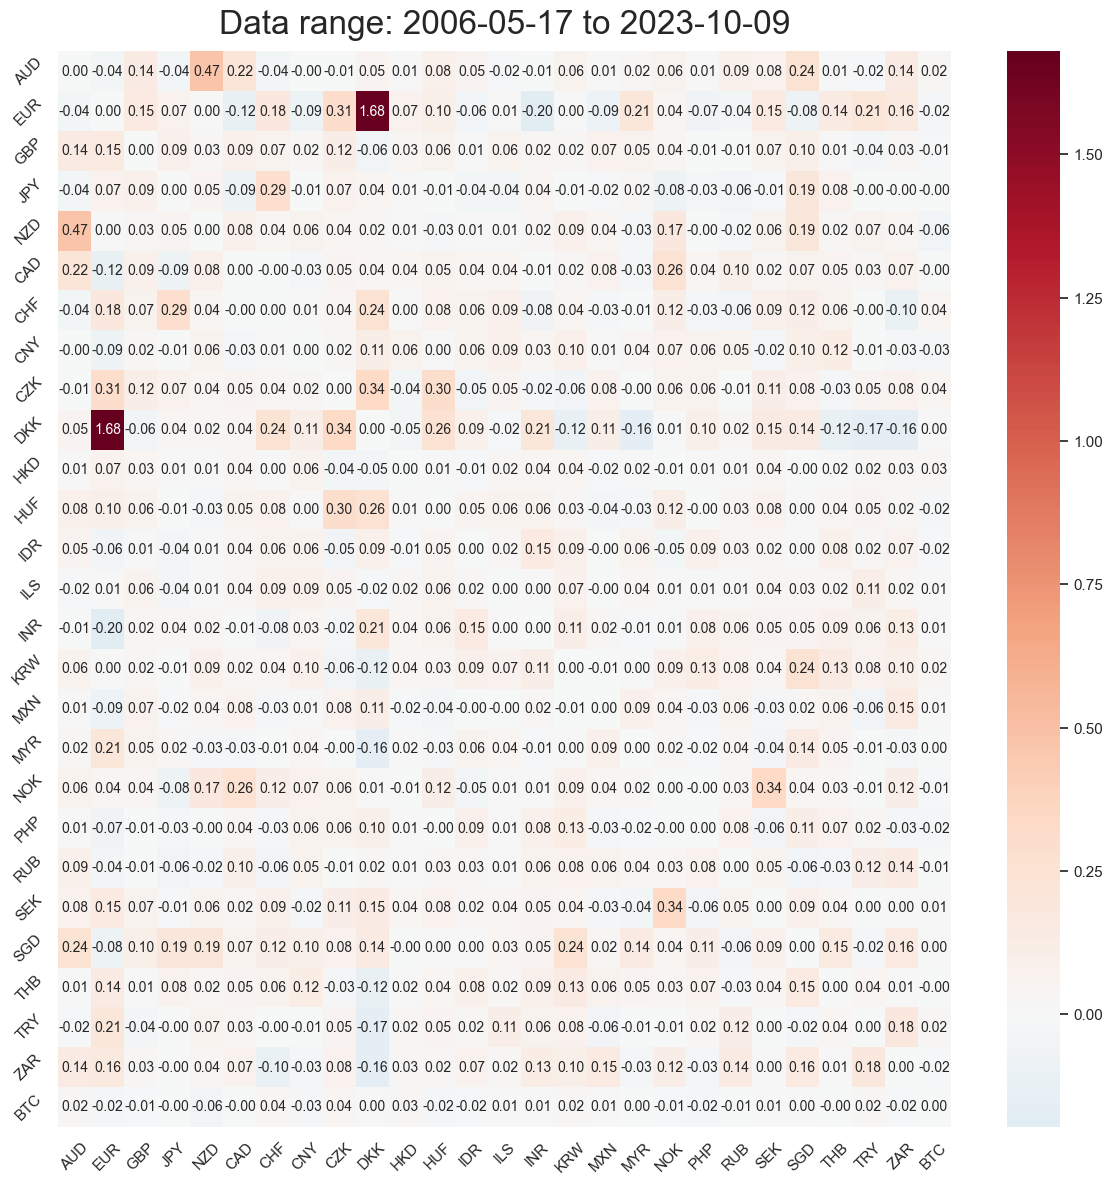

In [4]:
# Define a function to visualise the J matrix as a heatmap
def plot_heatmap(title, title_extended, subtitle):
    """
    Create a heatmap visualisation of the interaction matrix J.
    """
    # Plotting heatmaps for optimised parameters
    plt.figure(figsize=(12, 12))

    # heatmap plot for J
    sns.heatmap(J, annot=True, fmt='.2f', annot_kws={"size": 10}, cmap='RdBu_r', center=0,
                xticklabels=symbols, yticklabels=symbols)  # Create the heatmap with annotations
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title, subtitle)  # Add title and subtitle

    # Display the heatmap
    plt.tight_layout()
    plt.show()

# Visualise the optimised J matrix using the defined function
# plot_heatmap("Currency Pairwise Interactions Heatmap", "Currency Pairwise Interactions Heatmap with the Hidden Variable Z (USD)", "Data range: 2006-05-17 to 2023-10-09")
plot_heatmap(None, None, "Data range: 2006-05-17 to 2023-10-09")

### Plot Bar Chart of h Vector

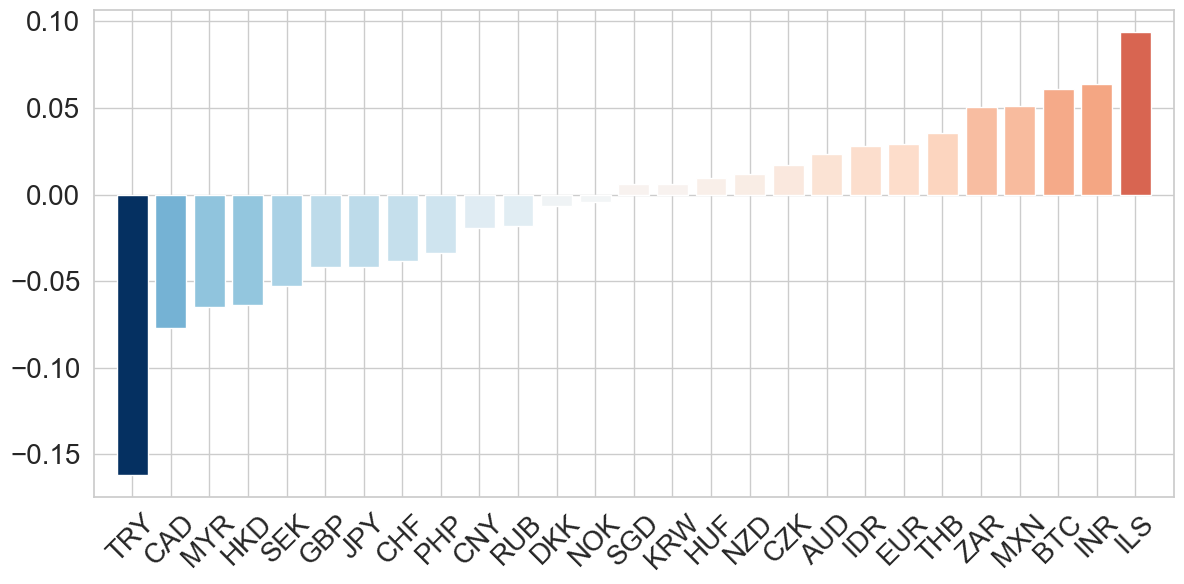

In [5]:
import matplotlib.cm as cm

# Define a function to visualise the h vector as a bar heatmap
def plot_external_field_barchart(title, subtitle):
    """
    Create a bar chart visualisation of the external field vector h.
    """

    # Set the figure size for better visibility
    plt.figure(figsize=(12, 6))

    # Normalize h values to the range [0, 1] for color mapping
    norm = plt.Normalize(min(h), -min(h))
    # Create a color map
    cmap = cm.ScalarMappable(norm=norm, cmap='RdBu_r')

    # Sort the h values and corresponding labels
    sorted_indices = np.argsort(h)
    h_sorted = h[sorted_indices]
    labels_sorted = np.array(symbols)[sorted_indices]

    # Create a barplot with sorted labels and h values
    for i, value in enumerate(h_sorted):
        color = cmap.to_rgba(value)
        plt.bar(labels_sorted[i], value, color=color)

    # Set the title and axis labels
    plt.xticks(rotation=45, fontsize=20)  # Rotate x labels for better fit
    plt.yticks(fontsize=20)  # Rotate y labels for better fit

    # Adjust the xlim to reduce the space
    plt.xlim(-1, len(h_sorted))  # Adjust these values as needed
    add_title_and_subtitle(title, subtitle)

    # Show the bar plot
    plt.tight_layout()
#    plt.savefig("Images/external_fields.svg", format="svg")
    plt.show()

# Visualise the optimised h vector using the defined function
plot_external_field_barchart(None, None)

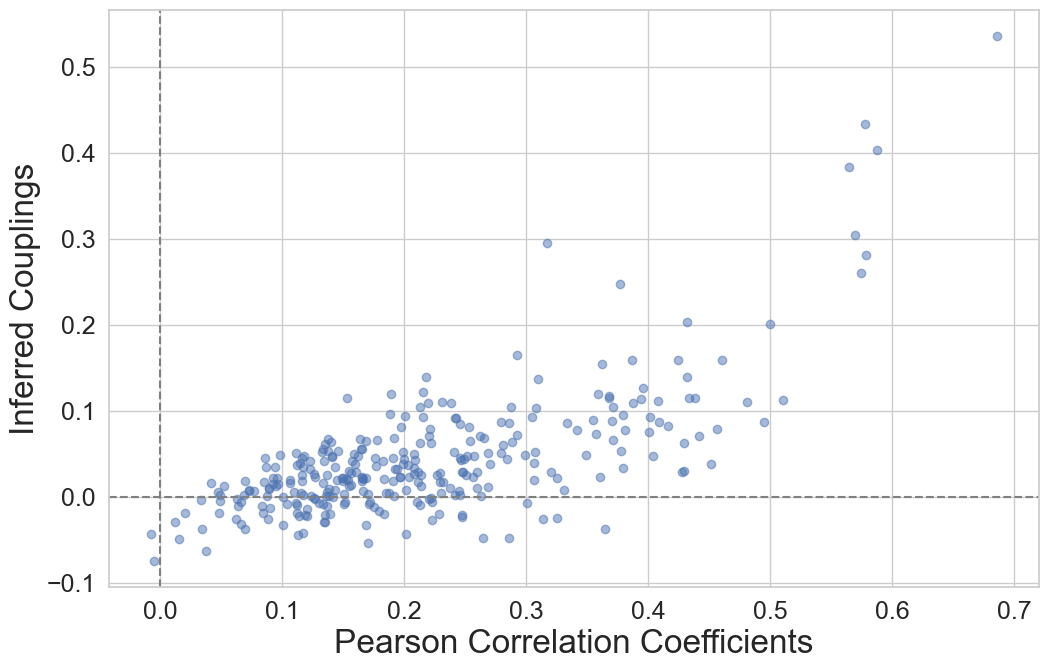

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the J matrix
j_matrix_df = pd.read_csv('Results/J.csv')

# Load the log returns data
log_returns_df = pd.read_csv('Results/data_matrix.csv')

# Drop the 'Date' column from the log_returns dataframe for correlation calculation
log_returns_no_date_df = log_returns_df.drop(columns=['Date'])

# Compute the Pearson correlation matrix
correlation_matrix = log_returns_no_date_df.corr()

# Convert the upper triangle matrices to DataFrames for easier handling and plotting
j_upper_triangle_df = pd.DataFrame(np.triu(j_matrix_df.values, k=1), columns=j_matrix_df.columns, index=j_matrix_df.index)
correlation_upper_triangle_df = pd.DataFrame(np.triu(correlation_matrix.values, k=1), columns=correlation_matrix.columns, index=correlation_matrix.index)

# Flatten the upper triangles of both matrices for a scatter plot comparison
j_upper_values = j_upper_triangle_df.values[np.triu_indices_from(j_upper_triangle_df, k=1)]
correlation_upper_values = correlation_upper_triangle_df.values[np.triu_indices_from(correlation_upper_triangle_df, k=1)]

# Scatter plot for comparing corresponding elements
plt.figure(figsize=(12, 7.5))
plt.scatter(correlation_upper_values, j_upper_values, alpha=0.5)
# plt.title('Comparison between Inferred J and Pearson Correlation Coefficients', fontsize = 19, y=1.01)
plt.ylabel('Inferred Couplings', fontsize = 24)
plt.xlabel('Pearson Correlation Coefficients', fontsize = 24)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

# Drawing lines at 0 on both axes
plt.axhline(0, color='gray', linestyle='--')  # Horizontal line at y=0
plt.axvline(0, color='gray', linestyle='--')  # Vertical line at x=0

plt.savefig("Images/J_vs_Corr.svg", format="svg")
plt.show()